In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import matplotlib as plt
import seaborn as sb
import pandas as pd

%matplotlib inline

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
transfusion = pd.read_csv("transfusion.csv")
transfusion.columns = "recency", "frequency", "monetary", "time", "y"
print(transfusion.head())

   recency  frequency  monetary  time  y
0        0         13      3250    28  1
1        1         16      4000    35  1
2        2         20      5000    45  1
3        1         24      6000    77  0
4        4          4      1000     4  0


In [12]:
transfusion.describe()

,recency,frequency,monetary,time,y
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,9.516734,5.455154,1363.788487,34.196787,0.236948
std,8.096150,5.611321,1402.830334,24.281086,0.425495
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,46.000000,11500.000000,98.000000,1.000000


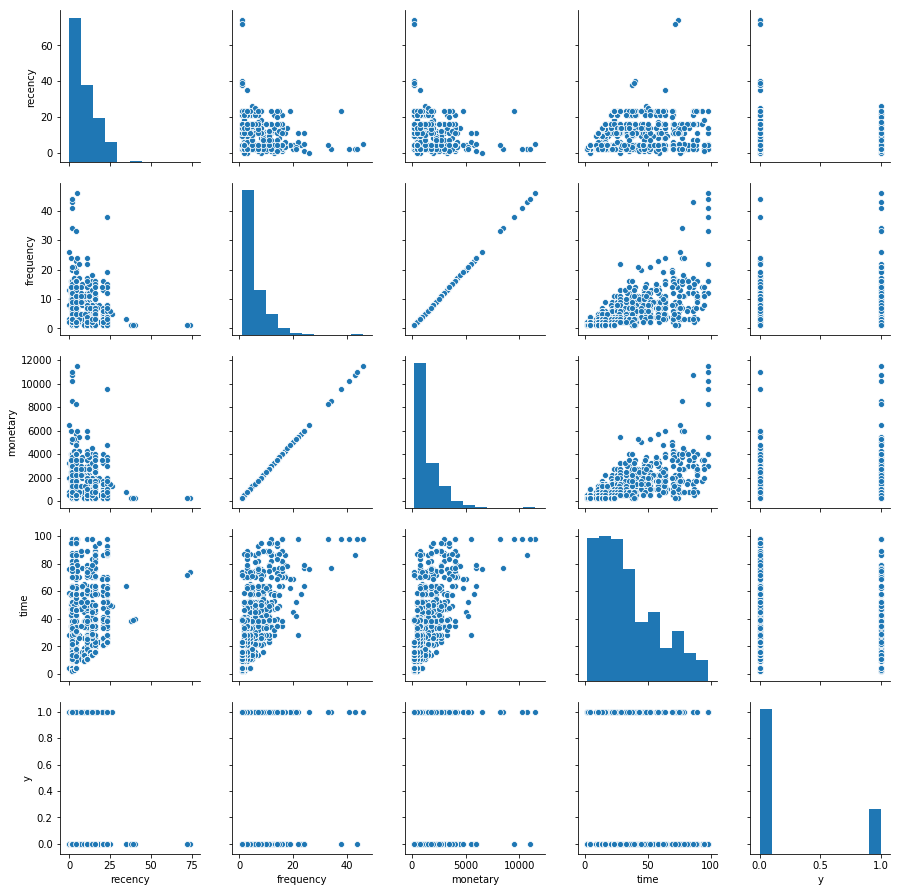

In [13]:
#draw scatter
sb.pairplot(transfusion)

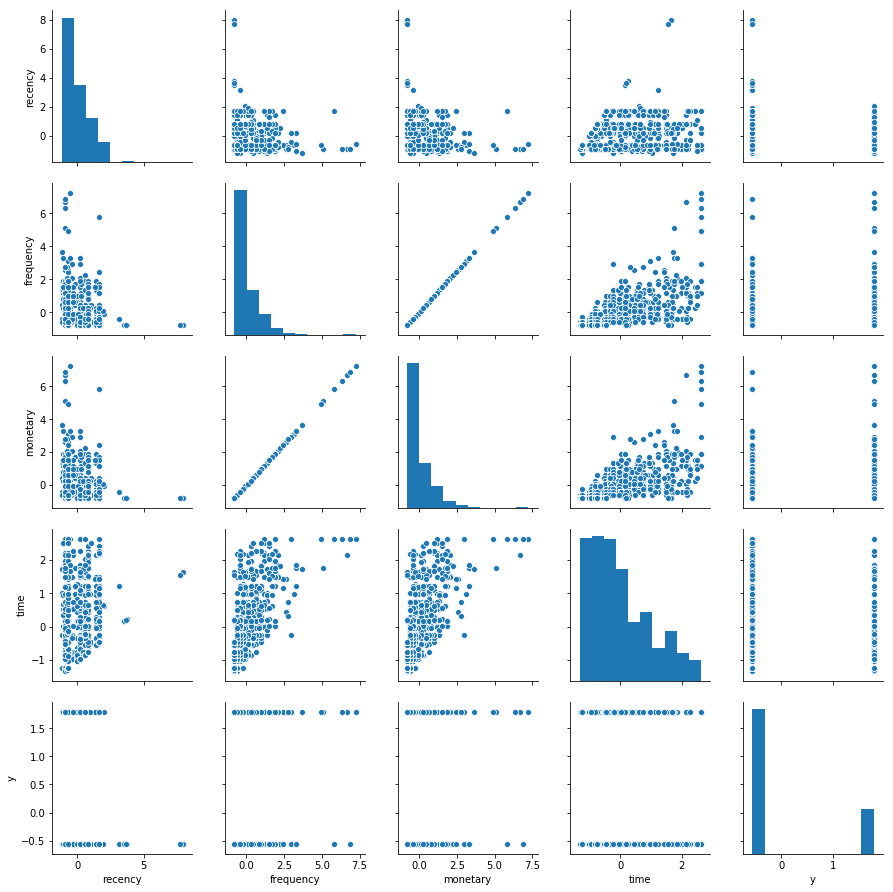

In [28]:
normalized_df = pd.DataFrame(scipy.stats.zscore(transfusion),index=transfusion.index,columns=transfusion.columns)
#print(normalized_df.head())
sb.pairplot(normalized_df)
X = normalized_df.drop("y",axis=1)
_X = X.drop("monetary",axis = 1)
Y = transfusion.y
Y = Y.values

#print(Y.head())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
_X_train, _X_test, _Y_train, _Y_test = train_test_split(_X,Y,test_size=0.2)

In [ ]:
#Create model
logreg = LogisticRegression()
_logreg = LogisticRegression()

#train
logreg.fit(X_train,Y_train)
_logreg.fit(_X_train,_Y_train)
#logreg.fit(X,Y)

#get score
predict = logreg.predict(X_test)
_predict = _logreg.predict(_X_test)
X_test_value = logreg.decision_function(X_test)
X_test_prob = sigmoid(X_test_value)
_X_test_value = _logreg.decision_function(_X_test)
_X_test_prob = sigmoid(_X_test_value)
print(logreg.score(X_test, Y_test))
print(_logreg.score(_X_test, _Y_test))
#logreg.score(X, Y)
print(Y_train.mean())
print(_Y_train.mean())

In [27]:
coeff_transfusion = pd.DataFrame([X_train.columns,logreg.coef_[0]]).T
print(coeff_transfusion)
_coeff_transfusion = pd.DataFrame([_X_train.columns,_logreg.coef_[0]]).T
print(_coeff_transfusion)

           0         1
0    recency -0.767564
1  frequency  0.360566
2   monetary  0.360566
3       time -0.503506
           0         1
0    recency -0.778439
1  frequency  0.791531
2       time -0.515121


In [17]:
pd.set_option("display.max_rows",140)
trans_test = pd.DataFrame(Y_test,columns=["answer"])
trans_test["predict"] = pd.Series(predict)
trans_test["T or F"] = pd.Series(Y_test==predict)
trans_test["test_value"] = pd.Series(X_test_value)
trans_test["prob(Do)"] = pd.Series(X_test_prob).round(4)
print(trans_test)

     answer  predict  T or F  test_value  prob(Do)
0         1        0   False   -2.131619    0.1061
1         0        0    True   -0.546317    0.3667
2         0        0    True   -1.590741    0.1693
3         1        0   False   -0.806057    0.3087
4         0        0    True   -2.123881    0.1068
5         1        0   False   -1.095173    0.2506
6         0        0    True   -1.015996    0.2658
7         0        1   False    0.404300    0.5997
8         0        0    True   -3.678562    0.0246
9         0        0    True   -0.546317    0.3667
10        0        0    True   -2.138706    0.1054
11        0        0    True   -1.543809    0.1760
12        1        0   False   -0.422722    0.3959
13        1        0   False   -1.974077    0.1220
14        1        0   False   -0.427077    0.3948
15        1        0   False   -0.331234    0.4179
16        1        0   False   -0.185488    0.4538
17        1        0   False   -0.869300    0.2954
18        0        0    True   